In [2]:
import ijson
import numpy as np
import json
from decimal import Decimal
import json
import time
import torch
import warnings
import numpy as np
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

In [46]:
from spheres import *
import matplotlib.pyplot as plt

In [ ]:
#Vamos primero a considerar 4 angulos

theta1 = np.pi
theta2 = np.pi/2
phi1 = 2*np.pi/3
phi2 = 4*np.pi/3

#Con esto conseguimos las coordenadas de dos puntos

# Punto 1
x1 = (np.sin(theta1)*np.cos(phi1))/(1 + np.cos(theta1))
y1 = (np.sin(theta1)*np.sin(phi1))/(1 + np.cos(theta1))
z1 = 0

# Punto 2
x2 = (np.sin(theta1)*np.cos(phi1))/(1 + np.cos(theta1))
y2 = (np.sin(theta1)*np.sin(phi1))/(1 + np.cos(theta1))
z2 = 0

/var/folders/1m/2d6q0t9j4jb00900lwvmlklr0000gn/T/ipykernel_42407/1754266329.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  x1 = (np.sin(theta1)*np.cos(phi1))/(1 + np.cos(theta1))
/var/folders/1m/2d6q0t9j4jb00900lwvmlklr0000gn/T/ipykernel_42407/1754266329.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  y1 = (np.sin(theta1)*np.sin(phi1))/(1 + np.cos(theta1))
/var/folders/1m/2d6q0t9j4jb00900lwvmlklr0000gn/T/ipykernel_42407/1754266329.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  x2 = (np.sin(theta1)*np.cos(phi1))/(1 + np.cos(theta1))
/var/folders/1m/2d6q0t9j4jb00900lwvmlklr0000gn/T/ipykernel_42407/1754266329.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  y2 = (np.sin(theta1)*np.sin(phi1))/(1 + np.cos(theta1))


In [95]:
theta1 = np.random.uniform(0, np.pi)
theta2 = np.random.uniform(0, np.pi)
phi1 = np.random.uniform(0, 2*np.pi)
phi2 = np.random.uniform(0, 2*np.pi)

P1 (x, y, z): [-0.85825665  0.50398797  0.09691052]
P2 (x, y, z): [ 0.67635166  0.19046619 -0.71152727]


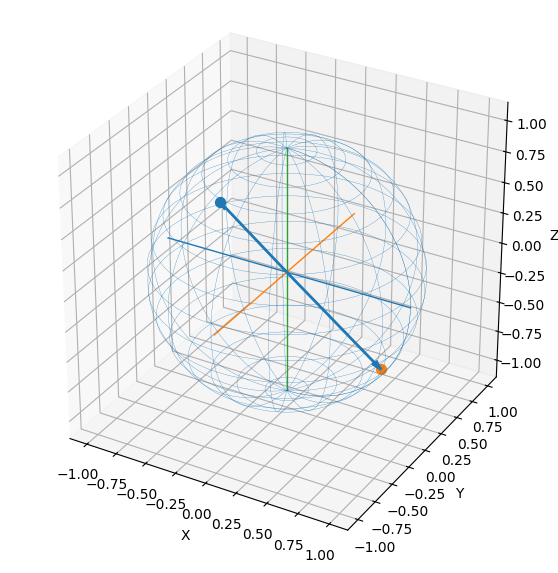

In [96]:
# Bloch sphere with two vectors P1(θ1, φ1) and P2(θ2, φ2)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 





def sph_to_cart(theta, phi, r=1.0):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

# Convert points
p1 = sph_to_cart(theta1, phi1)
p2 = sph_to_cart(theta2, phi2)

# ---- Plot ----
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1, 1, 1))

# Bloch sphere (unit radius)
u = np.linspace(0, np.pi, 60)
v = np.linspace(0, 2*np.pi, 60)
xs = np.outer(np.sin(u), np.cos(v))
ys = np.outer(np.sin(u), np.sin(v))
zs = np.outer(np.cos(u), np.ones_like(v))
ax.plot_wireframe(xs, ys, zs, linewidth=0.2, rstride=4, cstride=4)

# Axes lines
ax.plot([-1, 1], [0, 0], [0, 0], linewidth=1)
ax.plot([0, 0], [-1, 1], [0, 0], linewidth=1)
ax.plot([0, 0], [0, 0], [-1, 1], linewidth=1)

# Vectors from origin to points
ax.quiver(0, 0, 0, p1[0], p1[1], p1[2], arrow_length_ratio=0.08, linewidth=2)
ax.quiver(0, 0, 0, p2[0], p2[1], p2[2], arrow_length_ratio=0.08, linewidth=2)

# Points on the sphere
ax.scatter([p1[0]], [p1[1]], [p1[2]], s=50)
ax.scatter([p2[0]], [p2[1]], [p2[2]], s=50)

# Labels & guide
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Also print the Cartesian coordinates for clarity
print("P1 (x, y, z):", p1)
print("P2 (x, y, z):", p2)


In [110]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np


psi = np.array([np.cos(theta1/2),np.exp(1j*phi1)*np.sin(theta1/2)])
phi = np.array([np.cos(theta2/2),np.exp(1j*phi2)*np.sin(theta2/2)])

print("estado1:", psi)
print("estado2:", phi)

def tensor_simetrico(psi, phi):
    # Producto tensorial normal
    psi_phi = np.kron(psi, phi)
    phi_psi = np.kron(phi, psi)
    
    # Combinación simétrica (normalizada)
    estado_sim = (psi_phi + phi_psi) / np.sqrt(2)
    return estado_sim

qutrit = tensor_simetrico(psi, phi)

print("qutrit:", qutrit)


estado1: [ 0.74057765+0.j         -0.57945082+0.34026679j]
estado2: [0.37978463+0.j         0.89044107+0.25075553j]
qutrit: [ 0.39776172+0.j          0.31068451+0.22269058j  0.31068451+0.22269058j
 -0.8503533 +0.22300314j]


In [112]:
import numpy as np

# basis vectors for qubit (spin-1/2)
up = np.array([1, 0], dtype=complex)
down = np.array([0, 1], dtype=complex)

# tensor products
uu = np.kron(up, up)       # |↑↑>
ud = np.kron(up, down)     # |↑↓>
du = np.kron(down, up)     # |↓↑>
dd = np.kron(down, down)   # |↓↓>

# Spin-1 states (triplet)
S1_p1 = uu
S1_0  = (ud + du) / np.sqrt(2)
S1_m1 = dd

print("Spin-1 basis (triplet):")
print("|1,1> =", S1_p1)
print("|1,0> =", S1_0)
print("|1,-1> =", S1_m1)




Spin-1 basis (triplet):
|1,1> = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|1,0> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|1,-1> = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [113]:
import numpy as np
from math import sqrt, sin, cos

def bloch_state(theta, phi):
    return np.array([cos(theta/2), np.exp(1j*phi)*sin(theta/2)], dtype=complex)

def symmetric_qutrit(theta1, phi1, theta2, phi2):
    psi = bloch_state(theta1, phi1)
    phi = bloch_state(theta2, phi2)

    psi_phi = np.kron(psi, phi)
    phi_psi = np.kron(phi, psi)
    sym_unnorm = psi_phi + phi_psi

    overlap = np.vdot(psi, phi)  # <psi|phi>
    norm = np.sqrt(2*(1 + np.abs(overlap)**2))
    sym = sym_unnorm / norm

    # triplet basis in computational basis |00>,|01>,|10>,|11>
    up = np.array([1,0], dtype=complex)
    down = np.array([0,1], dtype=complex)
    uu = np.kron(up, up)
    ud = np.kron(up, down)
    du = np.kron(down, up)
    dd = np.kron(down, down)
    triplet_p1 = uu
    triplet_0  = (ud + du) / np.sqrt(2)
    triplet_m1 = dd

    basis = np.vstack([triplet_p1, triplet_0, triplet_m1])  # shape (3,4)
    coeffs = np.array([np.vdot(basis[i], sym) for i in range(3)], dtype=complex)
    coeffs /= np.linalg.norm(coeffs)  # numerical safety

    return coeffs, sym, overlap



In [114]:
symmetric_qutrit(theta1, phi1, theta2, phi2)

(array([ 0.3596338 +0.j        ,  0.39725751+0.28474385j,
        -0.76884168+0.20162691j]),
 array([ 0.3596338 +0.j        ,  0.28090348+0.20134431j,
         0.28090348+0.20134431j, -0.76884168+0.20162691j]),
 (-0.14938301871443613-0.4482880244423357j))